# Talent Decision Enabling Framework

#### Talent Analytics at your fingertips!

### CV Processing

In [40]:
import pandas as pd

In [41]:
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import numpy as np
# !pip install gensim

In [45]:
file_docs = []

with open ('C:\\Users\\Ramy\\Desktop\\CV.txt') as f:
    cv = f.read()

In [46]:
words = cv.split()
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
words = [word.lower() for word in words]
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
words = [lem.lemmatize(word,"v") for word in words]
from nltk.tokenize.treebank import TreebankWordDetokenizer
word_sentence=TreebankWordDetokenizer().detokenize(words)
word_sentence

'ernst and young ey mumbai inddia data full time hand experience microsoft powerbi tableau alteryx designer microsoft sql server studio analyst experience perform analytics implement automation solutions clients across finance sector award debutante risk advisory practice conduct train sessions senior management across india analytics tool enactus mumbai india president part time president team people two years assist eight beneficiaries generate usd per annum specialize research develop ngo relations tata consultancy service mumbai india project intern specialize database connectivity work tech solution bank sector extracurricular activities or previous history win harvard diplomacy award harvard world model unite nations keen interest data visualization work multiple project relate bi career interest business intelligence statistics sql health care disruption strategy consult'

In [47]:
word_sentence1 = word_sentence+". a."
word_sentence1

'ernst and young ey mumbai inddia data full time hand experience microsoft powerbi tableau alteryx designer microsoft sql server studio analyst experience perform analytics implement automation solutions clients across finance sector award debutante risk advisory practice conduct train sessions senior management across india analytics tool enactus mumbai india president part time president team people two years assist eight beneficiaries generate usd per annum specialize research develop ngo relations tata consultancy service mumbai india project intern specialize database connectivity work tech solution bank sector extracurricular activities or previous history win harvard diplomacy award harvard world model unite nations keen interest data visualization work multiple project relate bi career interest business intelligence statistics sql health care disruption strategy consult. a.'

### Job Description

In [49]:
file_docs = []

with open ('C:\\Users\\Ramy\\Desktop\\JD.txt') as f:
    jobdesc = f.read()

In [51]:
words = jobdesc.split()
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
words = [word.lower() for word in words]
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
words = [lem.lemmatize(word,"v") for word in words]
from nltk.tokenize.treebank import TreebankWordDetokenizer
word_sentence2=TreebankWordDetokenizer().detokenize(words)
word_sentence2


'term employment full time permanent job location west georgia street vancouver as machine learn scientist work software developers team design implement nlu model customers use interact smart devices home you help lay foundation move direct device interactions learn behaviors enable alexa proactively take action behalf customer and satisfaction work product friends family relate want use every day like world smart phone less years ago rare opportunity giant impact way people live salary commensurate experience basic qualifications master phd computer science machine learn statistics relate quantitative field years handson experience apply machine learn predictive model analysis algorithm model development experience largescale applications experience use python program script language well r matlab solid understand foundational statistics concepts nlu ml algorithms linearlogistic regression random forest boost gbm nns etc language require job english prefer qualifications all applican

# Check similarity between CV and JD

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import numpy as np

file_docs = []

tokens = sent_tokenize(word_sentence1)
for line in tokens:
    file_docs.append(line)

gen_docs = [[w.lower() for w in word_tokenize(text)]
            for text in file_docs]

dictionary = gensim.corpora.Dictionary(gen_docs)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)

sims = gensim.similarities.Similarity('C:\\Users\\Ramy\\Desktop\\',tf_idf[corpus],num_features=len(dictionary))
file2_docs = []

tokens = sent_tokenize(word_sentence2)
for line in tokens:
    file2_docs.append(line)

for line in file2_docs:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc) #update an existing dictionary and create bag of words

# perform a similarity query against the corpus
query_doc_tf_idf = tf_idf[query_doc_bow]


l1=list(sims[query_doc_tf_idf])


print("Similarity score is: {}%".format(l1[0]*100))

Similarity score is: 36.55434846878052%


## Key words identifier

In [62]:
import re
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize, punkt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from matplotlib import pyplot

#Job Descriptions of 250 CVs scraped from Indeeed
desc=pd.read_csv(r"C:\Users\Ramy\Desktop\descriptions_v2.csv")


In [63]:
desc.head()

,Description
0,This company is an e-retailer with a unique me...
1,Line of Service\nAdvisory\nIndustry/Sector\nFS...
2,Interested candidates may apply by emailing th...
3,"Our clientâ€¦\n\nOur client, a leading financi..."
4,Python Data Scientist - Research and Engineeri...


In [64]:
desc['Description'] = desc['Description'].map(lambda x: x.lower())

# Remove numbers
desc['Description'] = desc['Description'].map(lambda x: re.sub(r'\d+', '', x))

#remove punctuation
desc['Description']  = desc['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
desc['Description'] = desc['Description'].map(lambda x: x.strip())

# Tokenize into words
desc['Description'] = desc['Description'].map(lambda x: word_tokenize(x))

# Remove non alphabetic tokens
desc['Description'] = desc['Description'].map(lambda x: [word for word in x if word.isalpha()])

# Lemmitize
lem = WordNetLemmatizer()
desc['Description'] = desc['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
desc['Description'] = desc['Description'].map(lambda x: ' '.join(x))

In [65]:
#filter out stop words
stop_words = set(stopwords.words('english'))
desc['Description']= desc['Description']

# Tokenize into words
desc['Description'] = desc['Description'].map(lambda x: word_tokenize(x))

#Remove stopwords
desc['Description'] = desc['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Turn lists back to string
desc['Description'] = desc['Description'].map(lambda x: ' '.join(x))


In [66]:
import collections
import itertools

word_list = [sentence.lower().split() for sentence in desc['Description']]
list_of_words = list(itertools.chain(*word_list))

# Create counter
count_of_words = collections.Counter(list_of_words)
count_of_words.most_common(1000)

common_words_df = pd.DataFrame(count_of_words.most_common(1000),
                             columns=['words', 'count'])
common_words_df['Rank'] = np.arange(len(common_words_df))+1

In [19]:
common_words_df
common_words_df.to_csv('C:\\Users\\Ramy\\Desktop\\test3.csv')

Text(0.5, 1.0, 'Zipf Distribution')

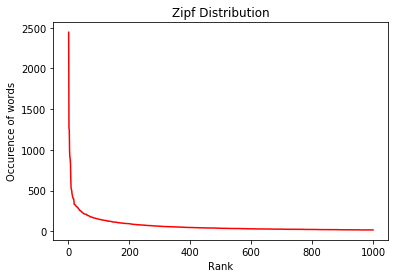

In [67]:
pyplot.plot(common_words_df['Rank'], common_words_df['count'], color='red')
pyplot.xlabel("Rank")
pyplot.ylabel("Occurence of words")
pyplot.title("Zipf Distribution")

# CV words comparison with JD top words

In [68]:
word_list1 = word_sentence.lower().split()

count_of_words1 = collections.Counter(word_list1)


common_words_df_cv = pd.DataFrame(count_of_words1.most_common(),
                             columns=['words', 'count'])
common_words_df_cv['Rank'] = np.arange(len(common_words_df_cv))+1

In [69]:
common_words_df_cv.head()

,words,count,Rank
0,mumbai,3,1
1,india,3,2
2,data,2,3
3,time,2,4
4,experience,2,5


Text(0.5, 1.0, 'CV Law Distribution')

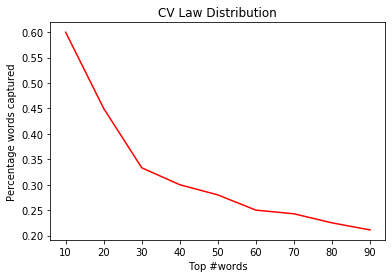

In [70]:
#CV law

top=range(10,100,10)
score=[]

for i in top:
    common_words_df_X = pd.DataFrame(count_of_words.most_common(i),
                                 columns=['words', 'count'])
    common_words_df_X['Rank'] = np.arange(i)+1
    merged_inner = pd.merge(left=common_words_df_cv,right=common_words_df_X, left_on='words', right_on='words')
    common = len(merged_inner)/i
    score.append(common)

pyplot.plot(top, score, color='red')
pyplot.xlabel("Top #words")
pyplot.ylabel("Percentage words captured")
pyplot.title("CV Law Distribution")



# JD verbs/adjectives ratio to total

In [71]:
tags1=nltk.pos_tag(list_of_words)
from collections import Counter
counts1 = Counter( tag for word,  tag in tags1)
print(counts1)

Counter({'NN': 43695, 'JJ': 16574, 'NNS': 12476, 'VBP': 8414, 'RB': 2516, 'VB': 2509, 'IN': 1124, 'VBD': 512, 'VBZ': 438, 'VBG': 401, 'CD': 352, 'JJS': 342, 'MD': 290, 'FW': 288, 'PRP': 256, 'VBN': 231, 'DT': 139, 'JJR': 138, 'RBR': 129, 'CC': 59, 'NNP': 48, 'RBS': 39, 'RP': 15, 'WRB': 9, 'POS': 7, 'WDT': 5, 'TO': 2, 'PRP$': 1})


In [72]:
verbs = counts1['VBN']+counts1['VBP']+counts1['VB']+counts1['VBZ']+counts1['VBD'] + counts1['VBG']

In [73]:
adj = counts1['JJ'] + counts1['JJS']

In [74]:
verb_ratio = verbs/len(list_of_words)
verb_ratio

0.13740399301168016

In [75]:
abj_ratio = adj/len(list_of_words)
abj_ratio

0.1858717269720577

# Clustering


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5,
                                 min_df=0.05,
                                 use_idf=True)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(desc['Description'])

Wall time: 70.1 ms


In [77]:
from sklearn.cluster import KMeans

num_clusters = 10
inertia = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(tfidf_matrix)
    inertia.append(km.inertia_)

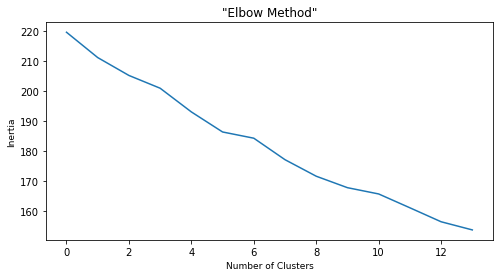

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(inertia)
plt.title('"Elbow Method"')
plt.xlabel('Number of Clusters', fontsize=9)
plt.ylabel('Inertia', fontsize=9)
plt.show()

In [79]:
from sklearn.cluster import KMeans

num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 1.91 s


In [80]:
inertia

[219.60191791729565,
 211.1650031578799,
 205.20831941535005,
 200.9547204325342,
 193.06098589233355,
 186.3809596288603,
 184.3066189736984,
 177.14826253379923,
 171.6421843586971,
 167.82602663097276,
 165.73481171798807,
 161.12917877485208,
 156.47388065375972,
 153.75615864744512]